In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

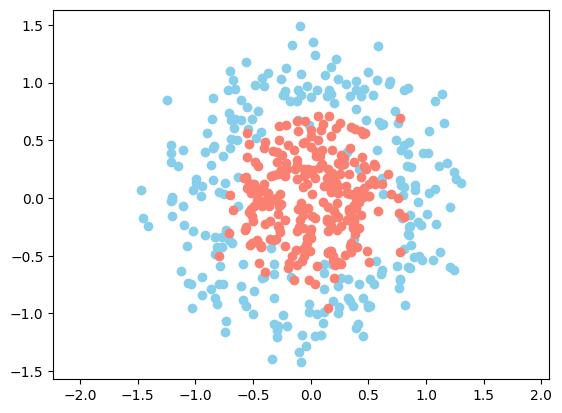

In [34]:
n = 500
p = 2
X, Y = make_circles(n_samples = n, factor = 0.4, noise=0.2)
Y = Y[:,np.newaxis]
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1], c="skyblue")
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1], c="salmon")
plt.axis("equal")
plt.show()

In [35]:
class neural_layer():
    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f
        self.b = np.random.rand(1,n_neur) * 2 - 1
        self.W = np.random.rand(n_conn,n_neur) * 2 - 1

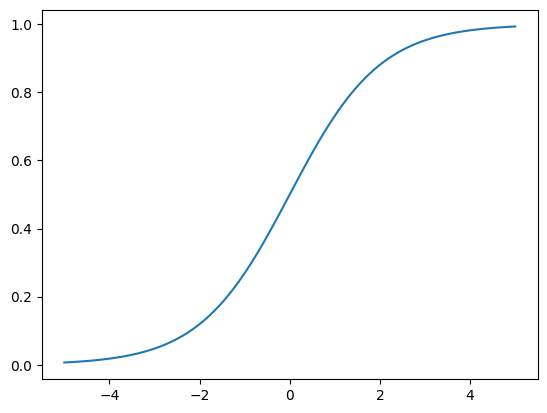

In [36]:
sigm = (lambda x : 1 / (1 + np.e ** (-x)),
        lambda x : x * (1 - x))

_x = np.linspace(-5,5,100)
plt.plot(_x,sigm[0](_x))

relu = lambda x: np.maximum(0,x) # no la voy a usar



In [37]:
def create_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(layer,topology[l+1], act_f))
    return nn

In [70]:
topology = [p,16,8,1]

for l in create_nn(topology,sigm):
    print(l)
    print(l.W.shape)

(2, 16)
(16, 8)
(8, 1)


In [71]:
neural_net = create_nn(topology,sigm)
l2_cost = (lambda Yp, Yr : np.mean((Yp - Yr) ** 2),
           lambda Yp, Yr : (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr=0.1, train=True):
    out = [(None,X)]
    #forward pass
    for l, layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        out.append((z,a))
    
    if train:
        # Backward pass
        deltas = []

        for l in reversed(range(0, len(neural_net))):
            z = out[l+1][0]
            a = out[l+1][1]
            if l == len(neural_net)-1:
                #calcular delta ultima capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else: 
                #calcular delta respecto a capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            _W = neural_net[l].W
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    return out[-1][1]

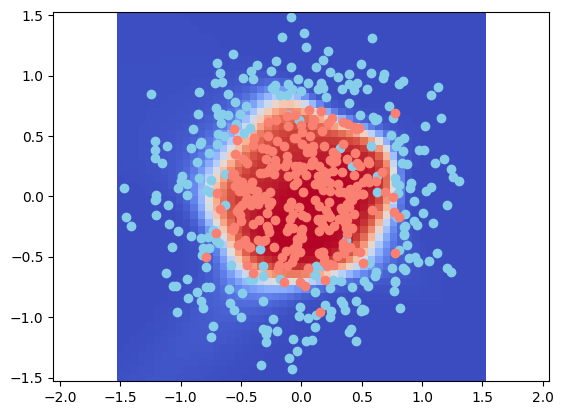

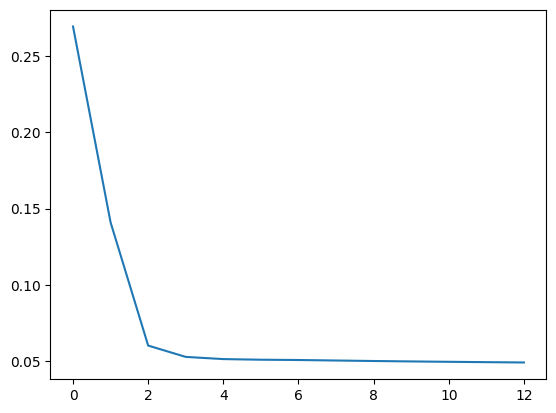

0.938

In [74]:
import time
from IPython.display import clear_output
from sklearn.metrics import accuracy_score

neural_n = create_nn(topology, sigm)
loss = []

for i in range(2500):
    pY = train(neural_n, X, Y, l2_cost, lr = 0.05)
    if i % 200 == 0:
        loss.append(l2_cost[0](pY,Y))
        res = 50
        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))
        for i0, x0 in enumerate(_x0):
            for i1,x1 in enumerate(_x1):
                _Y[i0,i1] = train(neural_n, np.array([x0,x1]), Y, l2_cost,train = False)[0][0]
        plt.pcolormesh(_x0, _x1, _Y, cmap = "coolwarm")
        plt.axis("equal")

        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

        clear_output(wait=True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)
predict = [round(i[0]) for i in pY]
accuracy_score(predict,Y)